In [1]:
import xarray as xr
import fsspec
import numpy as np
import s3fs
import zarr

In [ ]:
base_url = f's3://noaa-nws-aorc-v1-1-1km'

from dask.distributed import Client
client = Client()


In [21]:

# year = '1979'

# single_year_url = f'{base_url}/{year}.zarr/'

# ds_single = xr.open_zarr(fsspec.get_mapper(single_year_url, anon=True), consolidated=True).sel(latitude=slice(39,41)).sel(longitude=slice(-78,-76))

# print(ds_single)


In [ ]:
ds_single.time

<xarray.DataArray 'time' (time: 8016)> Size: 64kB
array(['1979-02-01T00:00:00.000000000', '1979-02-01T01:00:00.000000000',
       '1979-02-01T02:00:00.000000000', ..., '1979-12-31T21:00:00.000000000',
       '1979-12-31T22:00:00.000000000', '1979-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 64kB 1979-02-01 ... 1979-12-31T23:00:00
Attributes:
    long_name:                   verification time generated by wgrib2 functi...
    reference_date:              1979.02.01 00:00:00 UTC
    reference_time:              286675200.0
    reference_time_description:  kind of product unclear, reference date is v...
    reference_time_type:         0
    time_step:                   0.0
    time_step_setting:           auto

In [ ]:
from tqdm import tqdm

In [16]:
# # Loop over the years from 2017 to 2024
# # Saving for Washington DC as it is the sister city of Paris
# for year in tqdm(range(2017, 2025)):
#     # Create the URL for the specific year
#     single_year_url = f'{base_url}/{year}.zarr/'
    
#     # Open the dataset and select the desired latitude and longitude slices
#     ds_single = xr.open_zarr(fsspec.get_mapper(single_year_url, anon=True), consolidated=True).sel(latitude=slice(39, 41)).sel(longitude=slice(-78, -76)).compute()
    
#     # Save the dataset to a NetCDF file
#     output_file = f'noaa_aorc_{year}.nc'
#     ds_single.to_netcdf(output_file)
    
#     print(f'Saved {output_file}')

In [17]:
ds = xr.open_dataset('noaa_aorc_2023.nc')
ds

<xarray.Dataset> Size: 32GB
Dimensions:              (time: 8760, latitude: 240, longitude: 240)
Coordinates:
  * latitude             (latitude) float64 2kB 39.01 39.02 39.02 ... 40.99 41.0
  * longitude            (longitude) float64 2kB -77.99 -77.99 ... -76.01 -76.0
  * time                 (time) datetime64[ns] 70kB 2023-01-01 ... 2023-12-31...
Data variables:
    APCP_surface         (time, latitude, longitude) float64 4GB ...
    DLWRF_surface        (time, latitude, longitude) float64 4GB ...
    DSWRF_surface        (time, latitude, longitude) float64 4GB ...
    PRES_surface         (time, latitude, longitude) float64 4GB ...
    SPFH_2maboveground   (time, latitude, longitude) float64 4GB ...
    TMP_2maboveground    (time, latitude, longitude) float64 4GB ...
    UGRD_10maboveground  (time, latitude, longitude) float64 4GB ...
    VGRD_10maboveground  (time, latitude, longitude) float64 4GB ...

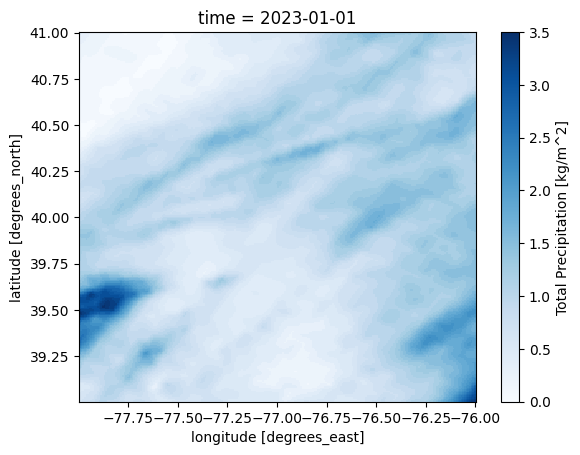

In [20]:
ds.APCP_surface.isel(time=0).plot(cmap='Blues')

In [3]:
ds = xr.open_mfdataset('noaa_aorc_????.nc')
ds

<xarray.Dataset> Size: 226GB
Dimensions:              (time: 61344, latitude: 240, longitude: 240)
Coordinates:
  * latitude             (latitude) float64 2kB 39.01 39.02 39.02 ... 40.99 41.0
  * longitude            (longitude) float64 2kB -77.99 -77.99 ... -76.01 -76.0
  * time                 (time) datetime64[ns] 491kB 2017-01-01 ... 2023-12-3...
Data variables:
    APCP_surface         (time, latitude, longitude) float64 28GB dask.array<chunksize=(8760, 240, 240), meta=np.ndarray>
    DLWRF_surface        (time, latitude, longitude) float64 28GB dask.array<chunksize=(8760, 240, 240), meta=np.ndarray>
    DSWRF_surface        (time, latitude, longitude) float64 28GB dask.array<chunksize=(8760, 240, 240), meta=np.ndarray>
    PRES_surface         (time, latitude, longitude) float64 28GB dask.array<chunksize=(8760, 240, 240), meta=np.ndarray>
    SPFH_2maboveground   (time, latitude, longitude) float64 28GB dask.array<chunksize=(8760, 240, 240), meta=np.ndarray>
    TMP_2maboveground    (time, latitude, longitude) float64 28GB dask.array<chunksize=(8760, 240, 240), meta=np.ndarray>
    UGRD_10maboveground  (time, latitude, longitude) float64 28GB dask.array<chunksize=(8760, 240, 240), meta=np.ndarray>
    VGRD_10maboveground  (time, latitude, longitude) float64 28GB dask.array<chunksize=(8760, 240, 240), meta=np.ndarray>

In [4]:
# ds.to_netcdf('noaa_aorc_washington_2017_2023.nc')

In [5]:
ds_APCP_surface = ds.APCP_surface.compute()

In [6]:
ds_APCP_surface.to_dataset().to_netcdf('noaa_aorc_washington_APCP_surface_2017_2023.nc')

In [7]:
import gc
for var in ['TMP_2maboveground', 'UGRD_10maboveground', 'VGRD_10maboveground']:
    ds_ = ds[var].compute()
    ds_.to_dataset().to_netcdf('noaa_aorc_washington_'+var+'_2017_2023.nc')
    del ds_
    gc.collect()